**Load Dataset**

In [15]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Install kaggle library
!pip install kaggle

# Upload kaggle.json
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"smmmmmmmm","key":"a3a14041a905df1323d84ed42f7cbbf9"}'}

In [21]:
# Load the dataset
# Move kaggle.json to the correct folder
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Download dataset
!kaggle datasets download -d mojtaba142/hotel-booking

Dataset URL: https://www.kaggle.com/datasets/mojtaba142/hotel-booking
License(s): copyright-authors
hotel-booking.zip: Skipping, found more recently modified local copy (use --force to force download)


In [22]:
# Download dataset
!unzip hotel-booking.zip -d ./datasets/

Archive:  hotel-booking.zip
replace ./datasets/hotel_booking.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [74]:
# Load dataset
file_path = "./datasets/hotel_booking.csv"
data = pd.read_csv(file_path, delimiter=',')

# Preview the dataset
print(data.head(500))



            hotel  is_canceled  lead_time  arrival_date_year  \
0    Resort Hotel            0        342               2015   
1    Resort Hotel            0        737               2015   
2    Resort Hotel            0          7               2015   
3    Resort Hotel            0         13               2015   
4    Resort Hotel            0         14               2015   
..            ...          ...        ...                ...   
495  Resort Hotel            0         92               2015   
496  Resort Hotel            0         91               2015   
497  Resort Hotel            0         38               2015   
498  Resort Hotel            0          6               2015   
499  Resort Hotel            0         38               2015   

    arrival_date_month  arrival_date_week_number  arrival_date_day_of_month  \
0                 July                        27                          1   
1                 July                        27                         

**Data Cleaning**


---



In [28]:
# Check for missing values
print(data.isnull().sum())

# Drop rows with missing values
data = data.dropna()

# Convert date columns to datetime
data['arrival_date_year'] = pd.to_datetime(data['arrival_date_year'])

# Standardize categorical values
data['hotel'] = data['hotel'].str.strip()
data['meal'] = data['meal'].str.strip()
data['market_segment'] = data['market_segment'].str.strip()

print(data.info())


hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

**Exploratory Data Analysis**

---

Number of Bookings by Hotel Type

<ipython-input-46-e1662bf33cbb>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='hotel', palette='coolwarm')


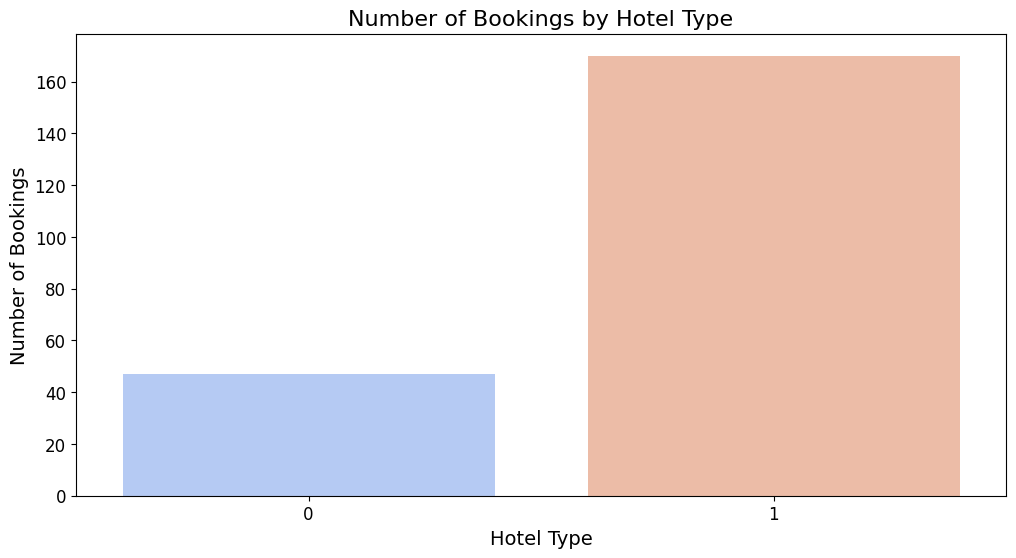

In [46]:
# Analyze booking counts by hotel type
booking_counts = data['hotel'].value_counts()

# Analyze cancellations
cancellations = data['is_canceled'].value_counts(normalize=True)

# Booking counts by hotel type
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='hotel', palette='coolwarm')
plt.title("Number of Bookings by Hotel Type", fontsize=16)
plt.xlabel("Hotel Type", fontsize=14)
plt.ylabel("Number of Bookings", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

Resort hotels attract more bookings than city hotels

Cancellation Rate

<ipython-input-47-c6d8bb237e1c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='is_canceled', y='lead_time', palette='viridis')


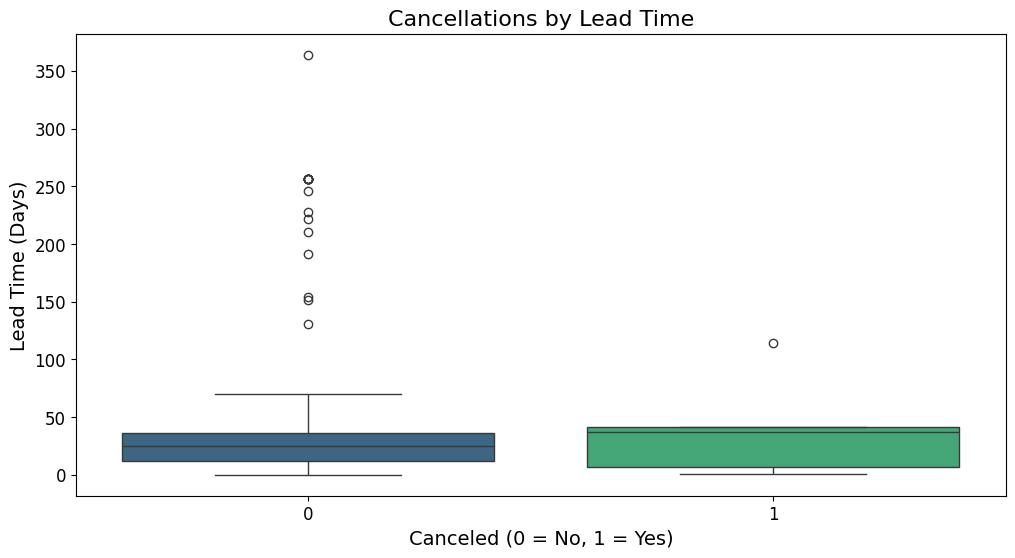

In [47]:
# Cancellations by lead time
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='is_canceled', y='lead_time', palette='viridis')
plt.title("Cancellations by Lead Time", fontsize=16)
plt.xlabel("Canceled (0 = No, 1 = Yes)", fontsize=14)
plt.ylabel("Lead Time (Days)", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

Heatmap for correlation matrix

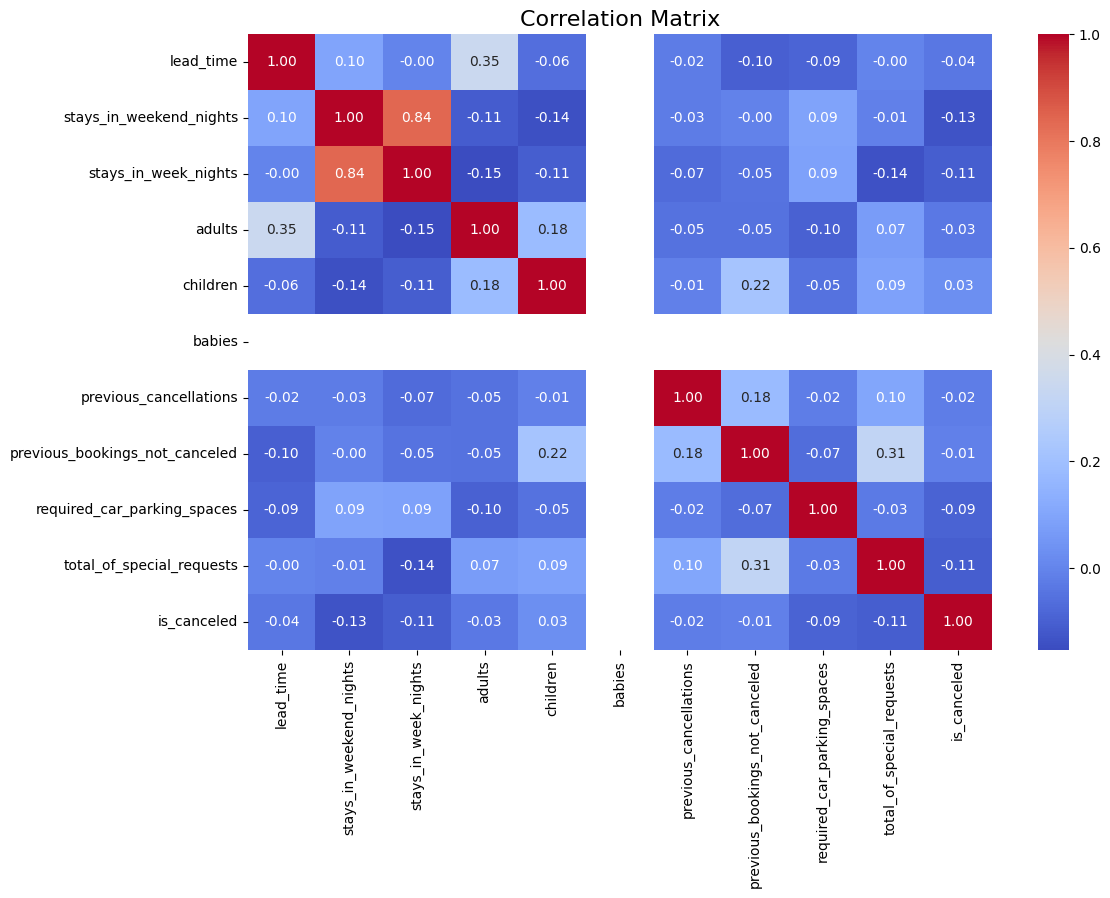

In [48]:
# Heatmap for correlation matrix
plt.figure(figsize=(12, 8))
correlation_matrix = data[features + ['is_canceled']].corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title("Correlation Matrix", fontsize=16)
plt.show()

Monthly Booking Trends

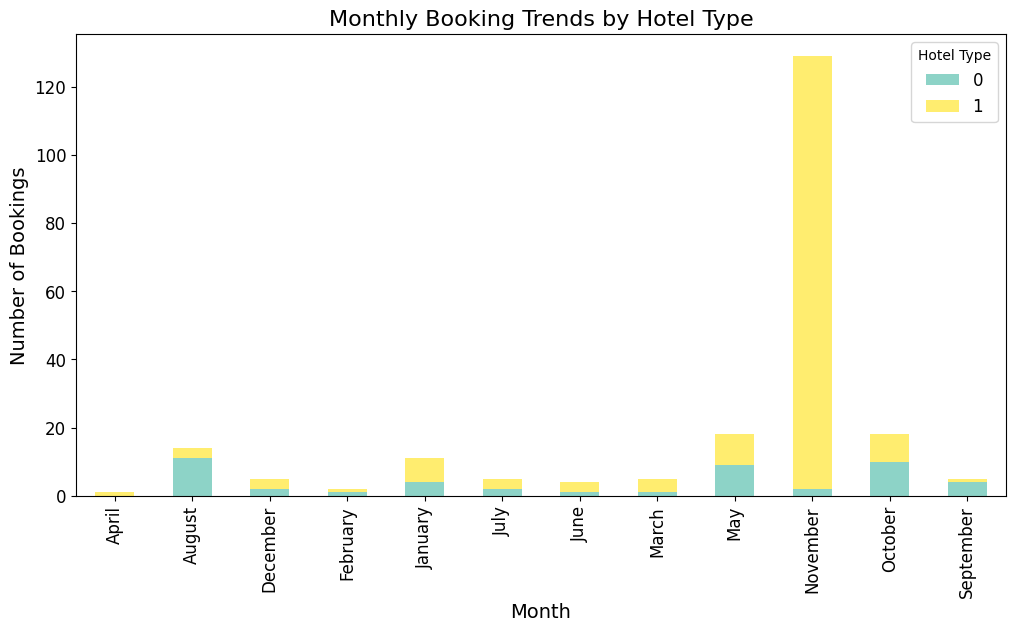

In [50]:
# Booking trends by month and hotel type
monthly_trends = data.groupby(['arrival_date_month', 'hotel'])['hotel'].count().unstack()
monthly_trends.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='Set3')
plt.title("Monthly Booking Trends by Hotel Type", fontsize=16)
plt.xlabel("Month", fontsize=14)
plt.ylabel("Number of Bookings", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title="Hotel Type", fontsize=12)
plt.show()

November highest number of bookings, may be due to seasonality

Cancellation rates by customer type

<ipython-input-51-f8cd7b8c1693>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x='customer_type', y='is_canceled', palette='muted')


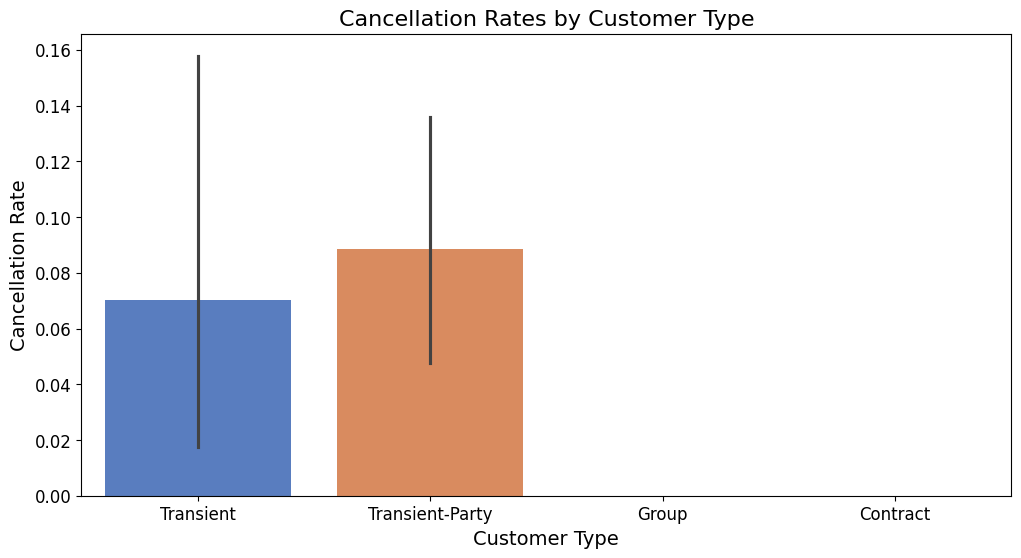

In [51]:
# Cancellation rates by customer type
plt.figure(figsize=(12, 6))
sns.barplot(data=data, x='customer_type', y='is_canceled', palette='muted')
plt.title("Cancellation Rates by Customer Type", fontsize=16)
plt.xlabel("Customer Type", fontsize=14)
plt.ylabel("Cancellation Rate", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

**MODELING**


---


Data Preparation

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV

# Feature engineering: Select features
features = ['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights',
            'adults', 'children', 'babies', 'previous_cancellations',
            'previous_bookings_not_canceled', 'required_car_parking_spaces',
            'total_of_special_requests']
X = data[features]
y = data['is_canceled']

# Encode categorical columns if necessary
le = LabelEncoder()
data['hotel'] = le.fit_transform(data['hotel'])

# Split data into train-test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Hyperparameter Tuning

In [60]:
from sklearn.model_selection import GridSearchCV

# Logistic Regression Hyperparameter Tuning
param_grid_lr = {
    'C': [0.1, 1, 10],
    'solver': ['lbfgs', 'liblinear'],
}
grid_search_lr = GridSearchCV(estimator=LogisticRegression(max_iter=500), param_grid=param_grid_lr, cv=5, scoring='accuracy')
grid_search_lr.fit(X_train, y_train)
best_lr = grid_search_lr.best_estimator_

# Random Forest Hyperparameter Tuning
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
}
grid_search_rf = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid_rf, cv=5, scoring='accuracy')
grid_search_rf.fit(X_train, y_train)
best_rf = grid_search_rf.best_estimator_

# Gradient Boosting Hyperparameter Tuning
param_grid_gb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
}
grid_search_gb = GridSearchCV(estimator=GradientBoostingClassifier(random_state=42), param_grid=param_grid_gb, cv=5, scoring='accuracy')
grid_search_gb.fit(X_train, y_train)
best_gb = grid_search_gb.best_estimator_


Model Training - Logistic Regression

In [61]:
# Logistic Regression
lr_model = LogisticRegression(max_iter=500)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

Model Training - Random Forest Classifier

In [62]:
# Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

Model Training - Gradient Boosting Machine

In [63]:
# Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)

Model Evaluation


---


Confusion Matrices

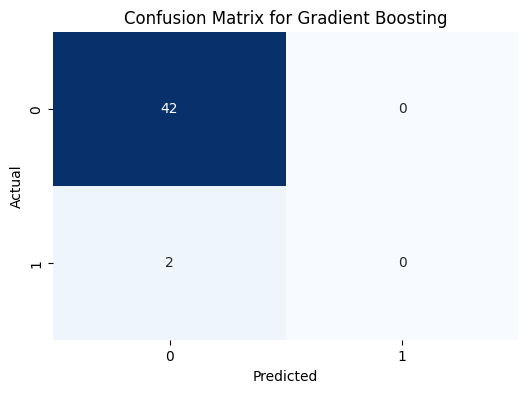

In [65]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title(f"Confusion Matrix for {name}")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

The Best Models

In [66]:
# Evaluate the best models
models = {'Logistic Regression': best_lr, 'Random Forest': best_rf, 'Gradient Boosting': best_gb}
for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"--- {name} ---")
    print(classification_report(y_test, y_pred))

--- Logistic Regression ---
              precision    recall  f1-score   support

           0       0.95      1.00      0.98        42
           1       0.00      0.00      0.00         2

    accuracy                           0.95        44
   macro avg       0.48      0.50      0.49        44
weighted avg       0.91      0.95      0.93        44

--- Random Forest ---
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        42
           1       0.00      0.00      0.00         2

    accuracy                           0.91        44
   macro avg       0.48      0.48      0.48        44
weighted avg       0.91      0.91      0.91        44

--- Gradient Boosting ---
              precision    recall  f1-score   support

           0       0.95      1.00      0.98        42
           1       0.00      0.00      0.00         2

    accuracy                           0.95        44
   macro avg       0.48      0.50      0.49        4

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m

ROC Curves

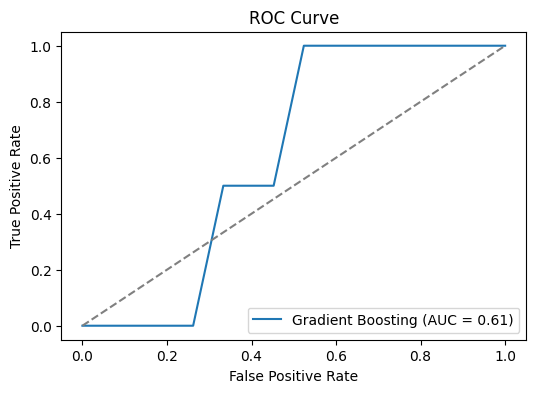

In [69]:
from sklearn.metrics import roc_curve, auc

y_pred_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()